In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryo_fts import fresnel
import astropy.units as u

plt.style.use('~/plotting_styles/light_mode.mplstyle')

In [2]:
kapton_reflection = pd.read_csv('../data/material_properties/kapton_3000um_reflectance.csv')
print(list(kapton_reflection.keys()))

kapton_opt_props = pd.read_csv('../data/material_properties/kapton_optical_properties.csv', comment='#')
print(list(kapton_opt_props.keys()))

['Angle of incidence, deg.', 'P-polarized', 'S-polarized', 'Non-polarized']
['Wavenumber_sigma_cm-1', 'Refractive_index_n', 'Absorption_alpha_cm-1']


In [3]:
sigmas = kapton_opt_props['Wavenumber_sigma_cm-1'].values * 1/u.cm
ns_kapton = kapton_opt_props['Refractive_index_n'].values
alphas = kapton_opt_props['Absorption_alpha_cm-1'].values * 1/u.cm
kappas = fresnel.extinction_coefficient(alphas, 1/sigmas)

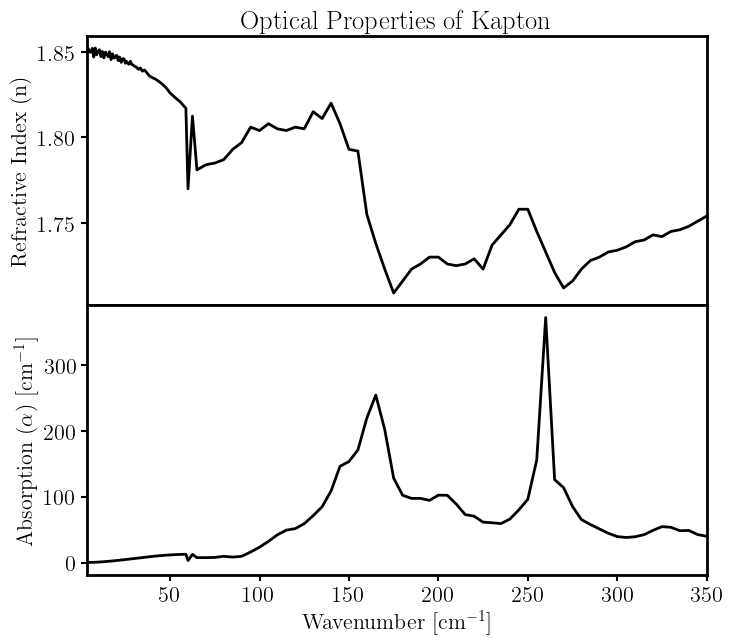

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(8,7), sharex=True)
fig.subplots_adjust(hspace=0)
axes[0].plot(sigmas, ns_kapton, color='k', lw=2)
axes[1].plot(sigmas, alphas, color='k', lw=2)
axes[1].set_xlabel(r'Wavenumber [cm$^{-1}$]')
axes[0].set_ylabel('Refractive Index (n)')
axes[1].set_ylabel(r'Absorption ($\alpha$) [cm$^{-1}$]')
axes[1].set_xlim(kapton_opt_props['Wavenumber_sigma_cm-1'].min(),
                 kapton_opt_props['Wavenumber_sigma_cm-1'].max())
axes[0].set_title('Optical Properties of Kapton')
plt.show()

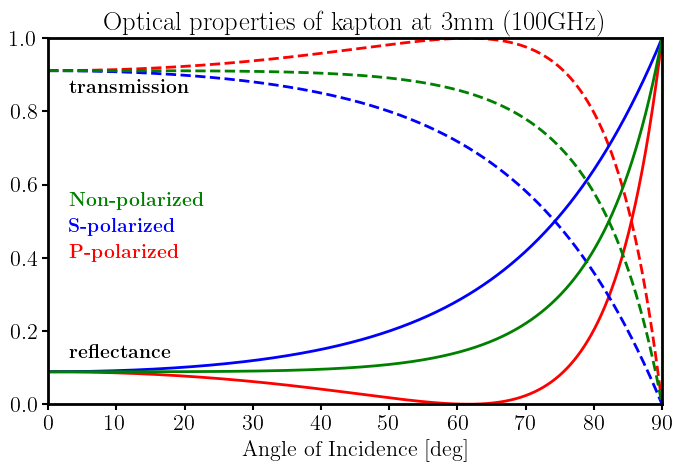

In [15]:
fig, axes = plt.subplots(1, 1)
colors = ['red', 'blue', 'green']
for i, key in enumerate(kapton_reflection.keys()[1:]):
    axes.plot(kapton_reflection['Angle of incidence, deg.'], kapton_reflection[key],
              color=colors[i], lw=2)
    axes.plot(kapton_reflection['Angle of incidence, deg.'], 1 - kapton_reflection[key],
              color=colors[i], lw=2, ls='dashed')
    axes.text(3, 0.4+0.07*i, rf'\textbf{{{key}}}', color=colors[i], fontsize=14, ha='left')
axes.text(3, 0.125, r'\textbf{reflectance}', color='k', fontsize=14, ha='left')
axes.text(3, 0.85, r'\textbf{transmission}', color='k', fontsize=14, ha='left')
axes.set_ylim(0, 1)
axes.set_xlim(0, 90)
axes.set_xlabel('Angle of Incidence [deg]')
axes.set_title('Optical properties of kapton at 3mm (100GHz)')
plt.tight_layout()
plt.show()

In [6]:
n_air = 1.0
thickness = 13 * u.um

theta_i = np.arange(0, 100, 10) * u.degree

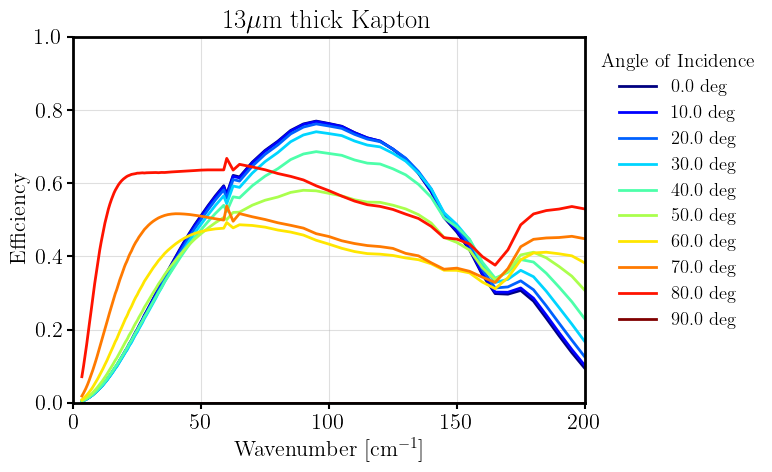

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(8,5))
colors = plt.cm.jet(np.linspace(0, 1, len(theta_i)))
for i, theta in enumerate(theta_i):
    bs = fresnel.BeamSplitter(n1=n_air, n2=ns_kapton, theta_i=theta,
                              thickness=thickness, sigma=sigmas, kappa=kappas)
    results = bs.evaluate()
    axes.plot(sigmas, results['E_avg'], color=colors[i], lw=2, label=theta)
axes.legend(title='Angle of Incidence', bbox_to_anchor=(1,1), loc='upper left')
axes.set_xlabel(r'Wavenumber [cm$^{-1}$]')
axes.set_ylabel('Efficiency')
axes.set_title(r'13$\mu$m thick Kapton')
axes.set_xlim(0, 200)
axes.set_ylim(0, 1)
axes.grid(alpha=0.4)
plt.tight_layout()
plt.show()